In [169]:
from spt3g import core
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=2., 
        rc={'figure.figsize': (12,10), 'lines.linewidth': 4.})
figsize=(12,10)

In [171]:
# Load the data files using a G3 pipeline
data_dir = "test_data"
data_file = "20191216_test_data_funcGen_analyzed.g3"
load_file = os.path.join(data_dir, data_file)

encoder_quad = []
encoder_clock = []
encoder_count = []
irig_clock = []
irig_time = []
time = []
angle = []

encoder_clock_jitter = []
irig_clock_jitter = []
angle_jitter = []
velocity = []
accel = []
time_smooth = []
velocity_smooth = []
accel_smooth = []
encoder_clock_jitter_freq = []
encoder_clock_jitter_psd = []
irig_clock_jitter_freq = []
irig_clock_jitter_psd = []
angle_jitter_freq = []
angle_jitter_psd = []
num_dropped_packets = 0

def save_arrays(frame):
    global encoder_quad
    global encoder_clock
    global encoder_count
    global irig_clock
    global irig_time
    global time
    global angle
    global encoder_clock_jitter
    global irig_clock_jitter
    global angle_jitter
    global velocity
    global accel
    global time_smooth
    global velocity_smooth
    global accel_smooth
    global encoder_clock_jitter_freq
    global encoder_clock_jitter_psd
    global irig_clock_jitter_freq
    global irig_clock_jitter_psd
    global angle_jitter_freq
    global angle_jitter_psd
    global num_dropped_packets
    
    if 'chwp_encoder_clock_jitter' in frame.keys():
        encoder_quad = np.array(list(frame['chwp_encoder_quad']))
        encoder_clock = np.array(list(frame['chwp_encoder_clock']))
        encoder_count = np.array(list(frame['chwp_encoder_count']))
        irig_clock = np.array(list(frame['chwp_irig_clock']))
        irig_time = np.array(list(frame['chwp_irig_time']))
        time = np.array(list(frame['chwp_time']))
        angle = np.array(list(frame['chwp_angle']))
        encoder_clock_jitter = np.array(list(frame['chwp_encoder_clock_jitter']))
        irig_clock_jitter = np.array(list(frame['chwp_irig_clock_jitter']))
        angle_jitter = np.array(list(frame['chwp_angle_jitter']))
        velocity = np.array(list(frame['chwp_velocity']))
        accel = np.array(list(frame['chwp_accel']))
        time_smooth = np.array(list(frame['chwp_time_smooth']))
        velocity_smooth = np.array(list(frame['chwp_velocity_smooth']))
        accel_smooth = np.array(list(frame['chwp_accel_smooth']))
        encoder_clock_jitter_freq = np.array(list(frame['chwp_encoder_clock_jitter_freq']))
        encoder_clock_jitter_psd = np.array(list(frame['chwp_encoder_clock_jitter_psd']))
        irig_clock_jitter_freq = np.array(list(frame['chwp_irig_clock_jitter_freq']))
        irig_clock_jitter_psd = np.array(list(frame['chwp_irig_clock_jitter_psd']))
        angle_jitter_freq = np.array(list(frame['chwp_angle_jitter_freq']))
        angle_jitter_psd = np.array(list(frame['chwp_angle_jitter_psd']))
        num_dropped_packets = frame['chwp_dropped_packets']
        return [frame]
    else:
        return [frame]

pipe = core.G3Pipeline()
pipe.Add(core.G3Reader(filename=load_file))
pipe.Add(save_arrays)

pipe.Run(profile=True)

# Raw Data Quality Checks

In the below sections, we look at the quality of the raw data coming from the encoder.

## Encoder Counter vs Encoder Count

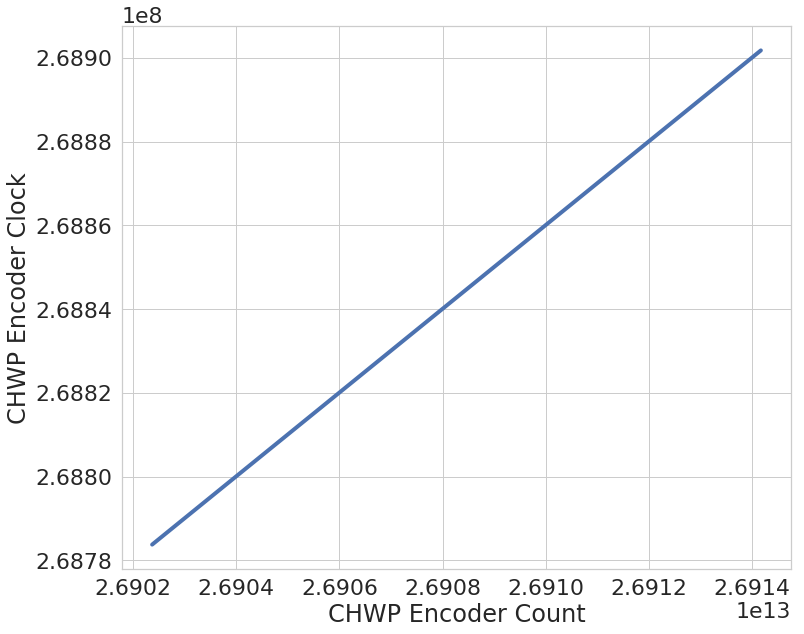

In [172]:
plt.figure(0, figsize=figsize)
plt.plot(encoder_clock, encoder_count)
plt.xlabel("CHWP Encoder Count")
plt.ylabel("CHWP Encoder Clock")
plt.show()

## IRIG Clock vs IRIG Time

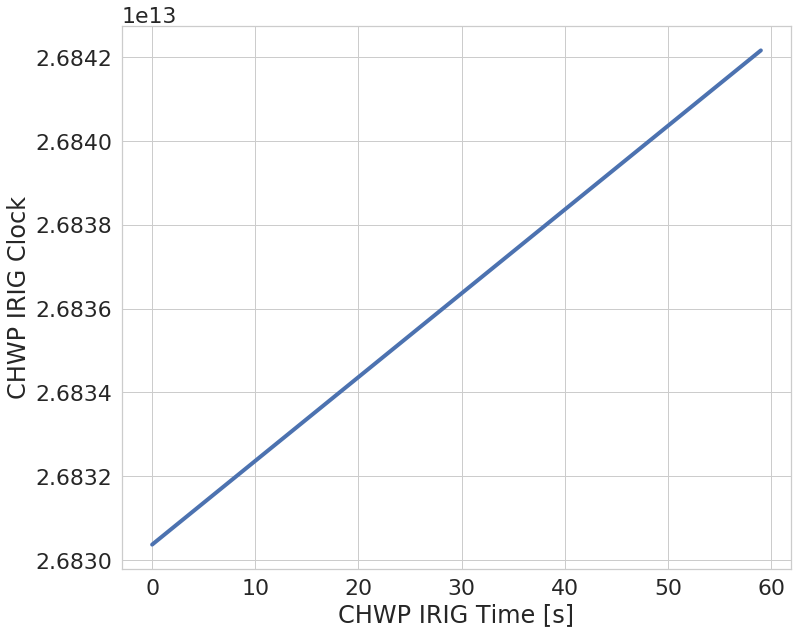

In [160]:
plt.figure(0, figsize=figsize)
plt.plot(irig_time - irig_time[0], irig_clock)
plt.xlabel("CHWP IRIG Time [s]")
plt.ylabel("CHWP IRIG Clock")
plt.show()

# Encoder Counter Jitter

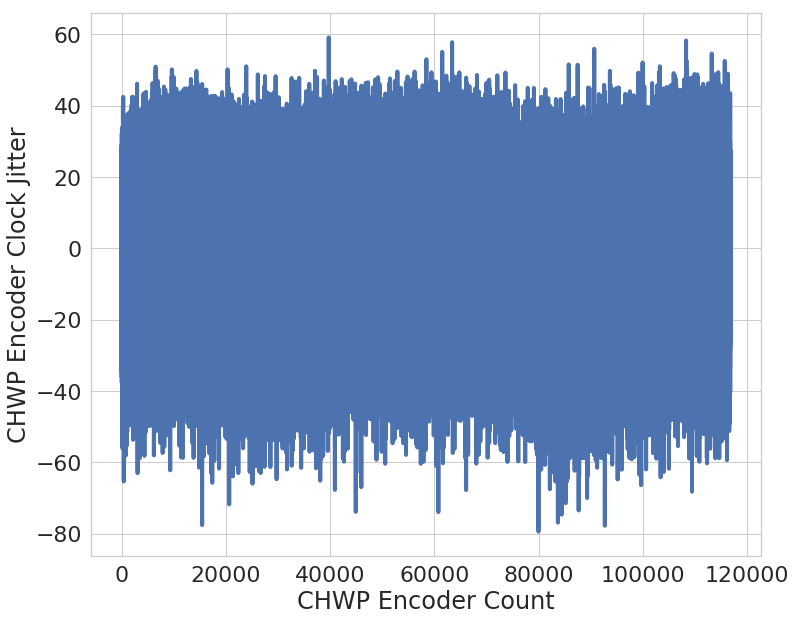

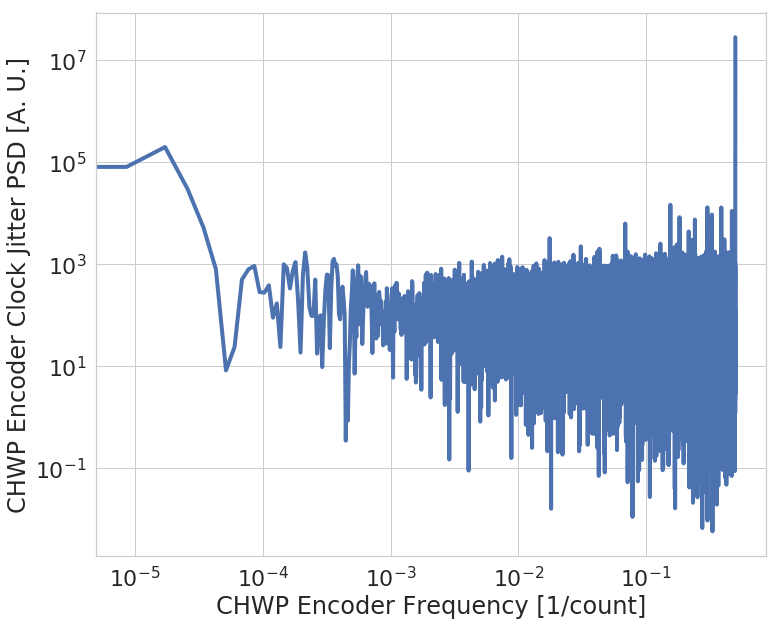

In [161]:
plt.figure(0, figsize=figsize)
plt.plot((encoder_count - encoder_count [0]), encoder_clock_jitter)
plt.xlabel("CHWP Encoder Count")
plt.ylabel("CHWP Encoder Clock Jitter")
plt.show()

plt.figure(1, figsize=figsize)
plt.loglog(encoder_clock_jitter_freq, encoder_clock_jitter_psd)
plt.xlabel("CHWP Encoder Frequency [1/count]")
plt.ylabel("CHWP Encoder Clock Jitter PSD [A. U.]")
plt.show()

# IRIG Counter Jitter

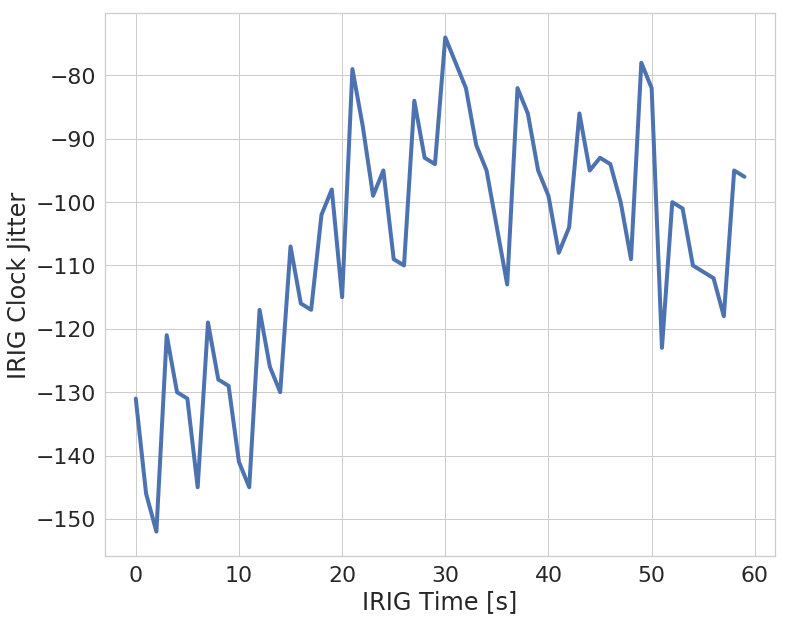

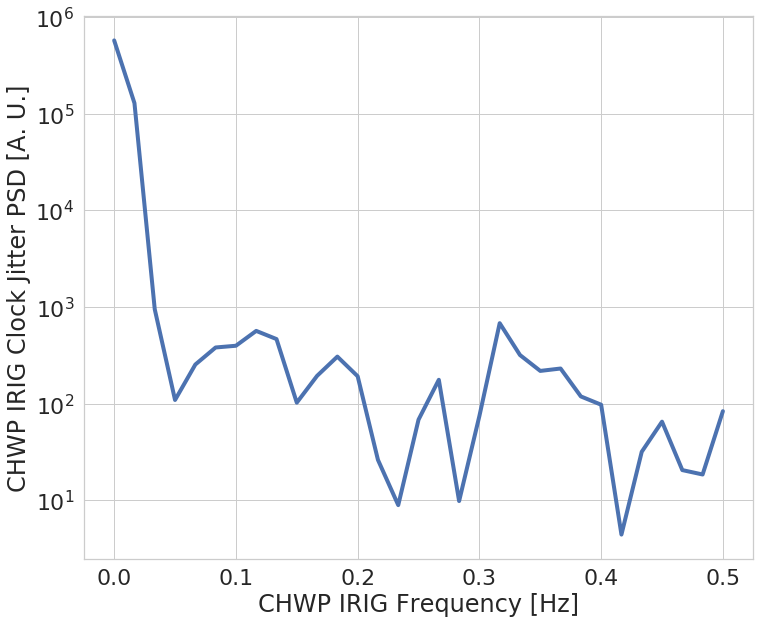

In [162]:
plt.figure(0, figsize=figsize)
plt.plot((irig_time - irig_time [0]), irig_clock_jitter)
plt.xlabel("IRIG Time [s]")
plt.ylabel("IRIG Clock Jitter")
plt.show()

plt.figure(1, figsize=figsize)
plt.semilogy(irig_clock_jitter_freq, irig_clock_jitter_psd)
plt.xlabel("CHWP IRIG Frequency [Hz]")
plt.ylabel("CHWP IRIG Clock Jitter PSD [A. U.]")
plt.show()

# CHWP Data Quality Checks

## Angle vs time

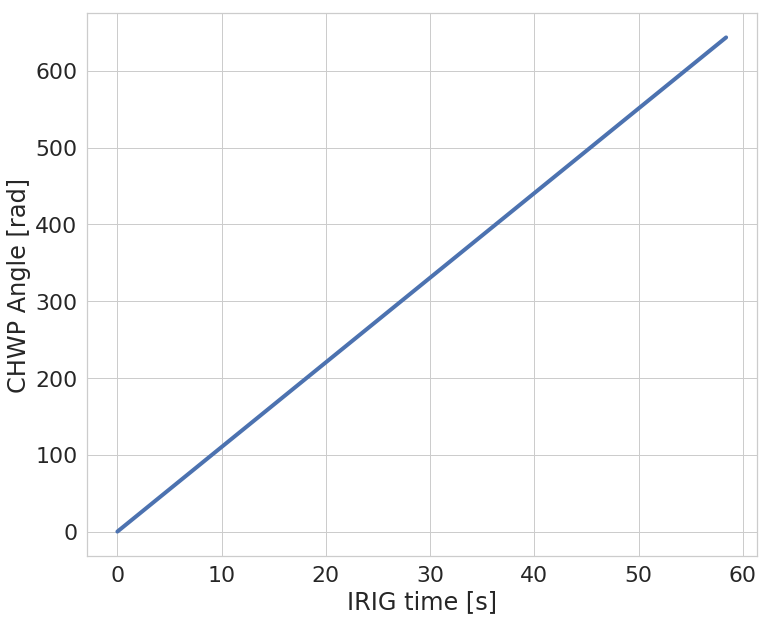

In [163]:
plt.figure(0, figsize=figsize)
plt.plot((time - time[0]), angle)
plt.xlabel("IRIG time [s]")
plt.ylabel("CHWP Angle [rad]")
plt.show()

## Angle jitter

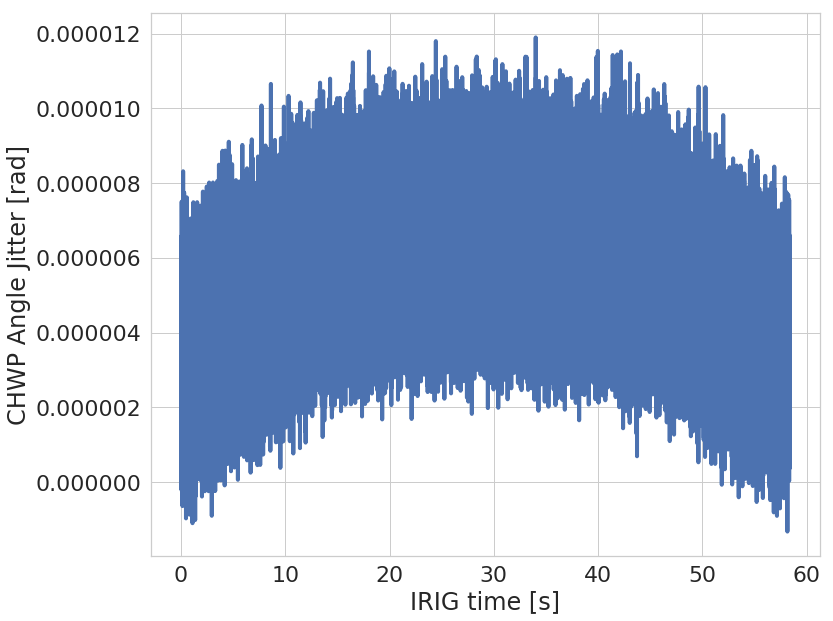

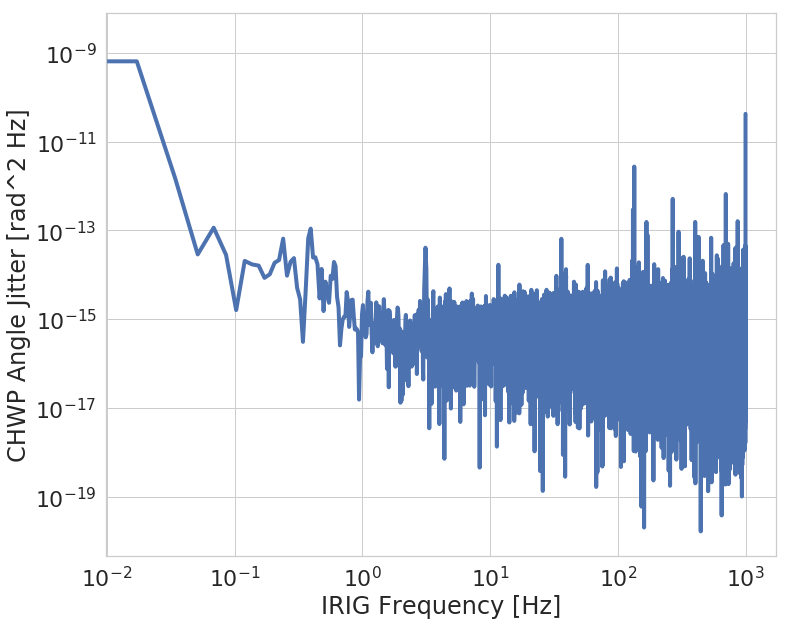

In [164]:
plt.figure(0, figsize=figsize)
plt.plot((time - time[0]), angle_jitter)
plt.xlabel("IRIG time [s]")
plt.ylabel("CHWP Angle Jitter [rad]")
plt.show()

plt.figure(1, figsize=figsize)
plt.loglog(angle_jitter_freq, angle_jitter_psd)
plt.xlabel("IRIG Frequency [Hz]")
plt.ylabel("CHWP Angle Jitter [rad^2 Hz]")
plt.show()

## CHWP Velocity

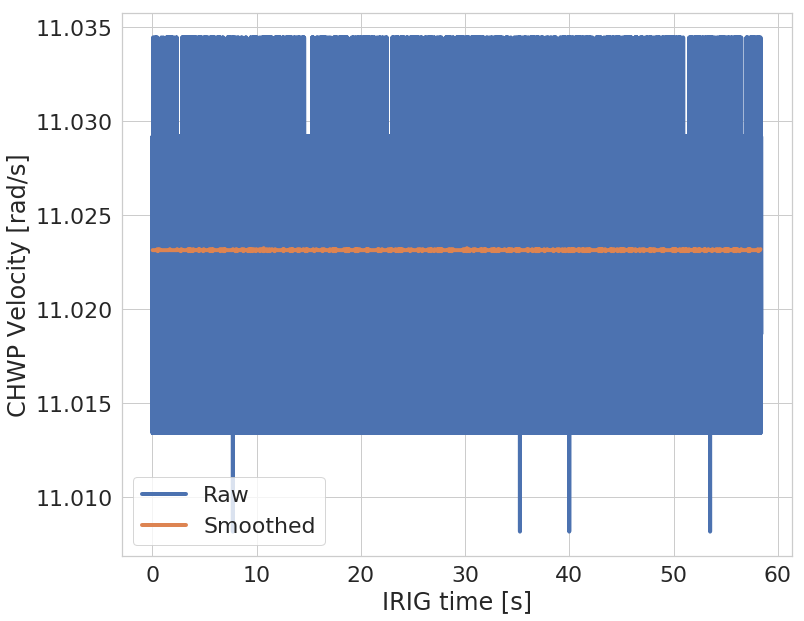

In [165]:
plt.figure(0, figsize=figsize)
plt.plot((time - time[0])[:-1], velocity, label="Raw")
plt.plot((time_smooth - time[0]), velocity_smooth, label="Smoothed")
plt.xlabel("IRIG time [s]")
plt.ylabel("CHWP Velocity [rad/s]")
plt.legend()
plt.show()

## CHWP Acceleration

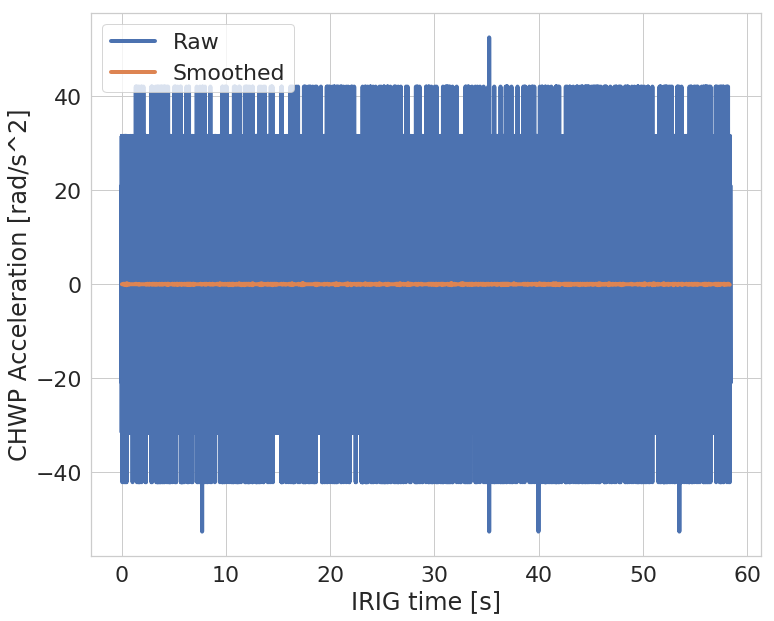

In [166]:
plt.figure(0, figsize=figsize)
plt.plot((time - time[0])[:-2], accel, label="Raw")
plt.plot((time_smooth - time[0]), accel_smooth, label="Smoothed")
plt.xlabel("IRIG time [s]")
plt.ylabel("CHWP Acceleration [rad/s^2]")
plt.legend()
plt.show()

## Quadrature Output

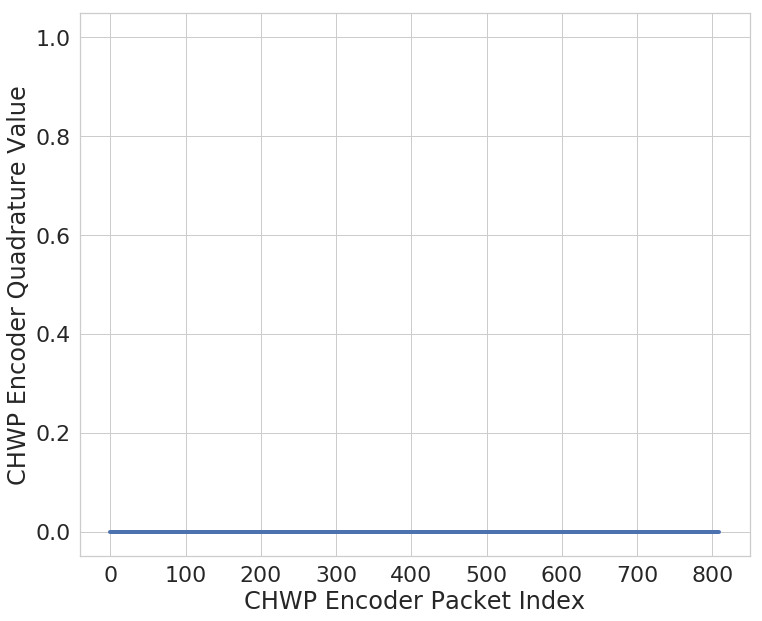

In [173]:
plt.figure(0, figsize=figsize)
plt.plot(encoder_quad)
plt.xlabel("CHWP Encoder Packet Index")
plt.ylabel("CHWP Encoder Quadrature Value")
plt.ylim(-0.05, 1.05)
plt.show()

## Number of dropped packets

In [168]:
print("Number of dropped CHWP packets:", num_dropped_packets)

('Number of dropped CHWP packets:', 0)
